Dias-Alves, T., Mairal, J., Blum, M.G.B., 2018. Loter: A Software Package to Infer Local Ancestry for a Wide Range of Species. Mol Biol Evol 35, 2318–2326. https://doi.org/10.1093/molbev/msy126

In [1]:
import os
import allel
import numpy as np
import loter.locanc.local_ancestry as lc

In [5]:
os.chdir("/master/nplatt/sch_man_nwinvasion/results/loter")

`vcf2npy` convert a VCF File to a numpy matrix with values 0, 1 and 2.

This is a function provided by the `loter`'s example notebook

In [6]:
def vcf2npy(vcfpath):
    callset = allel.read_vcf(vcfpath)
    haplotypes_1 = callset['calldata/GT'][:,:,0]
    haplotypes_2 = callset['calldata/GT'][:,:,1]
    
    m, n = haplotypes_1.shape
    mat_haplo = np.empty((2*n, m))
    mat_haplo[::2] = haplotypes_1.T
    mat_haplo[1::2] = haplotypes_2.T
    
    return mat_haplo.astype(np.uint8)

Read in vcf to numpy array of haplotypes (columns = variants, rows = haplotypes)

In [7]:
brazil_hs   = vcf2npy("auto_beagle_loter_brazil_ref.vcf")
rodhaini_hs = vcf2npy("auto_beagle_loter_rodhaini_ref.vcf")
query_hs    = vcf2npy("auto_beagle_loter_query.vcf")

run loter

In [9]:
res_loter = lc.loter_smooth(l_H         = [brazil_hs, rodhaini_hs], 
                            h_adm       = query_hs, 
                            num_threads = 8) 

In [ ]:
np.savetxt("result_mex.txt", res_loter, fmt="%i")

In [10]:
print(res_loter.shape)

(288, 475081)


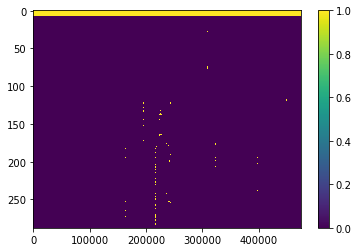

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(res_loter, interpolation='nearest', aspect='auto')
plt.colorbar()
plt.savefig("brazil_rod_ref.png")

## all brazil in ref

In [16]:
brazil_hs   = vcf2npy("auto_beagle_loter_allbrazil_ref.vcf")
rodhaini_hs = vcf2npy("auto_beagle_loter_rodhaini_ref.vcf")
query_hs    = vcf2npy("auto_beagle_loter_nobrquery.vcf")

In [ ]:
all_brazil_res_loter = lc.loter_smooth(l_H         = [brazil_hs, rodhaini_hs], 
                                       h_adm       = query_hs, 
                                       num_threads = 24) 

In [ ]:
print(all_brazil_res_loter.shape)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(all_brazil_res_loter, interpolation='nearest', aspect='auto')
plt.colorbar()
plt.savefig("brazil_rod_ref.png")